# Face Recognition 

#### Importamos Librerias

In [21]:
import os 
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

#### Extraemos datos

In [22]:
dataDir = 'dataset/part1/part1/'
listImages = os.listdir(dataDir)


In [23]:
map_characters = {
    0: 'Male',
    1: 'Female'
}


#### Creamos el Dataset

In [24]:
images = []
ages = []
genders = []



for filename in listImages:
    file = filename.split('_')
    age = file[0]
    gender = file[1]
    ages.append(age)
    genders.append(gender)
    if filename.endswith('.jpg'):
        filePath = os.path.join(dataDir,filename)
        image = cv2.imread(filePath)
        if image is None:
            print(f"Error al leer la imagen: {filePath}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image= cv2.resize(image, (128,128))
        images.append(image)
    # file  = image_file.split('_')
    # age, gender, race = file[0], file[1], file[2]
    # data.append((image_file, int(age), int(gender)))
print(images)


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: bad Huffman code
libpng warning: iCCP: known incorrect sRGB profile


[array([[46, 42, 37, ..., 48, 42, 35],
       [39, 34, 27, ..., 25, 19, 20],
       [32, 24, 17, ..., 22, 25, 29],
       ...,
       [12, 10, 17, ..., 13, 10, 10],
       [16, 19, 16, ..., 12,  9,  8],
       [14, 12, 11, ..., 12,  9,  8]], dtype=uint8), array([[33, 32, 41, ..., 64, 63, 91],
       [29, 38, 54, ..., 66, 66, 87],
       [26, 42, 64, ..., 57, 58, 73],
       ...,
       [36, 28, 26, ..., 29, 28, 28],
       [33, 29, 28, ..., 40, 38, 38],
       [28, 29, 30, ..., 39, 38, 35]], dtype=uint8), array([[187, 179, 171, ..., 203, 204, 205],
       [194, 186, 176, ..., 197, 202, 206],
       [195, 187, 178, ..., 196, 203, 209],
       ...,
       [ 67,  67,  72, ...,  24,  26,  25],
       [ 68,  68,  71, ...,  22,  21,  20],
       [ 66,  67,  72, ...,  22,  21,  20]], dtype=uint8), array([[ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [11, 12, 10, ..., 41, 42, 39],
       [13, 12, 15, ..., 47, 52, 5

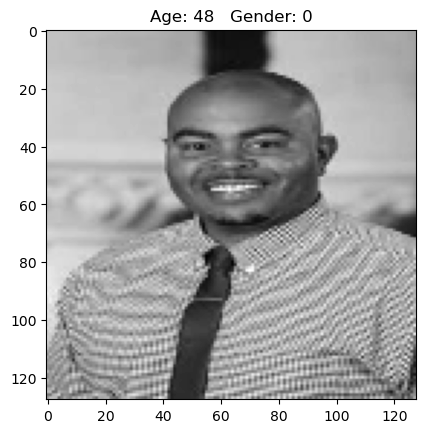

In [34]:
if images:
    plt.title(f'Age: {ages[position]}   Gender: {genders[position]}')
    plt.imshow(images[position], cmap='gray')
    plt.show()

In [27]:
df = pd.DataFrame(data, columns=['filename', 'age', 'gender'])
df.head()


NameError: name 'data' is not defined

#### Preprocesamiento

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_datagen = data_gen.flow_from_dataframe(
    dataframe=dataDir,
    batch_size = 32,
    class_mode = 'binary'
)


# test_datagen = data_gen.flow_from_dataframe(
#     dataframe=dataDir,
#     batch_size = 32,
#     class_mode = 'binary'
# )

AttributeError: 'str' object has no attribute 'copy'